In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

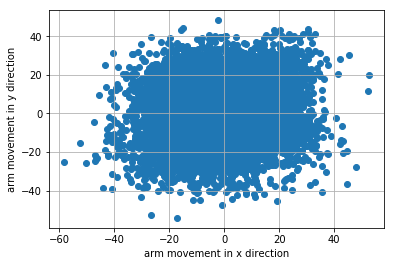

In [96]:
with open('example_data_s1.pickle', 'rb') as fp:
    X,y = pickle.load(fp)
plt.scatter(y[:,0],y[:,1])
plt.xlabel('arm movement in x direction')
plt.ylabel('arm movement in y direction')
plt.grid()
plt.show()

In [97]:
tsamp = 0.05

nt,nneuron = X.shape
yLen,nout = y.shape
ttotal = tsamp * nt
print(nt)
print(nneuron)
print(nout)
print(ttotal)

61339
52
2
3066.9500000000003


In [99]:
from sklearn.model_selection import train_test_split

Xtr,Xts,ytr,yts = train_test_split(X,y,test_size = 0.33)

In [104]:
regr = LinearRegression().fit(Xtr,ytr)
yhat = regr.predict(Xts)
rsq = r2_score(yts,yhat)
print(rsq)

0.4599704631540127


In [105]:
def create_dly_data(X,y,dly):
    xlen,ylen = X.shape
    Xdly = np.zeros((xlen-dly,(dly+1)*ylen))
    
    ylenx,yleny = y.shape
    ydly = np.zeros((ylenx-dly,yleny))
    
    for i in range(xlen-dly):
        Xdly[i,:] = np.hstack(X[i:i+dly+1,:])
    for i in range(ylenx-dly):
        ydly[i,:] = y[i+dly,:]
    return Xdly, ydly

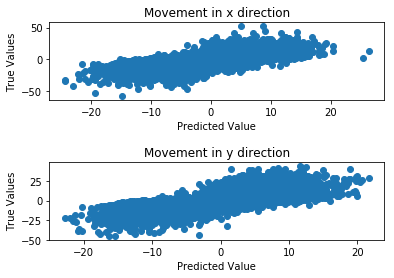

<Figure size 720x360 with 0 Axes>

In [128]:
lenx,leny = yts.shape
xlenx,xleny = Xts.shape
plt.subplot(2,1,1)
plt.scatter(yhat[:,0],yts[:,0])
plt.title("Movement in x direction")
plt.xlabel("Predicted Value")
plt.ylabel("True Values")
plt.subplots_adjust(hspace=0.8)
plt.subplot(2,1,2)
plt.scatter(yhat[:,1],yts[:,1])
plt.title("Movement in y direction")
plt.xlabel("Predicted Value")
plt.ylabel("True Values")
plt.figure(figsize=(10,5))
plt.show()
    

In [9]:
xdly,ydly = create_dly_data(X,y,6)

Xtrdly,Xtsdly,ytrdly,ytsdly = train_test_split(xdly,ydly,test_size = 0.33)

regrdly = LinearRegression().fit(Xtrdly,ytrdly)
yhat_dly = regrdly.predict(Xtsdly)
rsqdly = r2_score(ytsdly,yhat_dly)
print(rsqdly)

0.6906990736635675


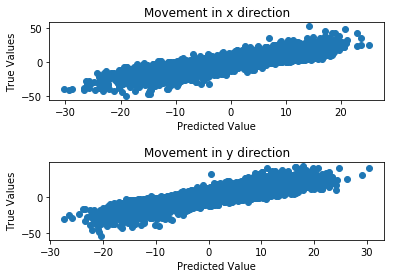

<Figure size 720x360 with 0 Axes>

In [129]:
lenx,leny = ytsdly.shape
xlenx,xleny = Xtsdly.shape
plt.subplot(2,1,1)
plt.scatter(yhat_dly[:,0],ytsdly[:,0])
plt.title("Movement in x direction")
plt.xlabel("Predicted Value")
plt.ylabel("True Values")
plt.subplots_adjust(hspace=0.8)
plt.subplot(2,1,2)
plt.scatter(yhat_dly[:,1],ytsdly[:,1])
plt.title("Movement in y direction")
plt.xlabel("Predicted Value")
plt.ylabel("True Values")
plt.figure(figsize=(10,5))
plt.show()

In [11]:
nred = 60000
Xred = X[:nred]
yred = y[:nred]

In [86]:
dmax = 15
Xdly,Ydly = create_dly_data(Xred,yred,dmax)

In [87]:
import  sklearn.model_selection 

nfold = 5

kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

dtest = np.arange(16)
nd = len(dtest)

Rsq = np.zeros((nd, nfold))

for isplit, Ind in enumerate(kf.split(Xdly)):
    print("fold = %d" %isplit)
    
    Itr,Its = Ind
    for it, d in enumerate(dtest):
        xdly1 = Xdly[:,:nneuron*(d+1)]
        xtr = xdly1[Itr]
        ytr = Ydly[Itr]
        xts = xdly1[Its]
        yts = Ydly[Its]
        
        regTs = LinearRegression().fit(xtr,ytr)
        yhatTs = regTs.predict(xts)
        Rsq[it,isplit] = r2_score(yts,yhatTs)

fold = 0
fold = 1
fold = 2
fold = 3
fold = 4


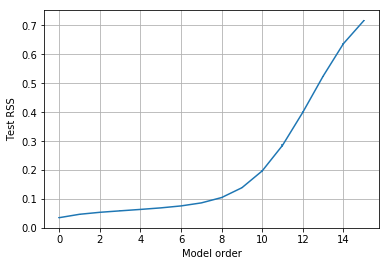

In [88]:
RSS_mean = np.mean(Rsq,axis=1)
RSS_std = np.std(Rsq,axis=1)/np.sqrt(nfold-1)
plt.errorbar(dtest, RSS_mean, yerr = RSS_std, fmt="-")
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

In [89]:
imax = np.argmax(RSS_mean)
print("The estimated model order is {0:d}".format(dtest[imax]))

The estimated model order is 15


Estimated order of model is 15


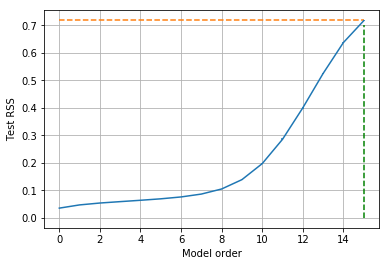

In [94]:
imax = np.argmax(RSS_mean)
RSS_tgt = RSS_mean[imax]+RSS_std[imax]
I = np.where(RSS_mean < RSS_tgt)[0]
iopt = I[imax]
dopt = dtest[iopt]

plt.errorbar(dtest, RSS_mean, yerr = RSS_std, fmt="-")

plt.plot([dtest[0],dtest[imax]],[RSS_tgt,RSS_tgt],'--')


plt.plot([dopt,iopt], [0,0.7], 'g--')

plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

print("Estimated order of model is %d" %dopt)